In [10]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import gradio as gr

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
# import pathlib
# dataset_url = "https://download1337.mediafire.com/yhgits6y0kdg/e2l6lqmva4h1ae9/dataset_rempah.zip"
# data_dir = tf.keras.utils.get_file('dataset_rempah', origin=dataset_url, untar=True)
# # data_dir = pathlib.Path(data_dir)
data_dir = '/content/drive/MyDrive/datahelm'
print(data_dir)

/content/drive/MyDrive/datahelm


In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 299 files belonging to 3 classes.
Using 240 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 299 files belonging to 3 classes.
Using 59 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Pengendara Helm full face', 'Pengendara halfface', 'tanpa helem kompres']


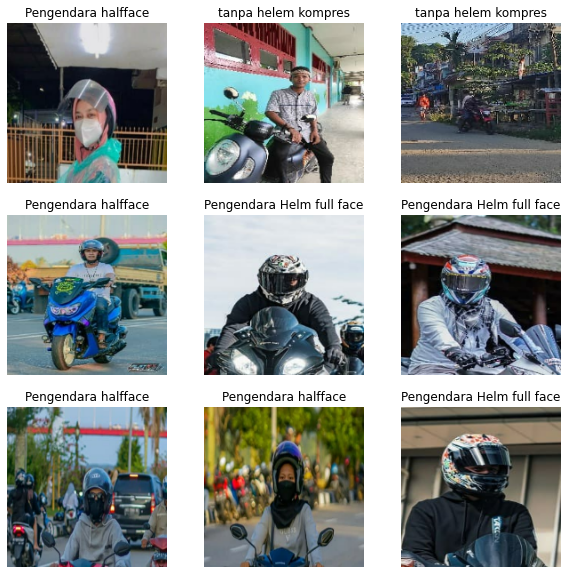

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
num_classes = 3

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation = 'relu', input_shape = (180,180,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 30s 2s/step - loss: 520.3567 - accuracy: 0.2917 - val_loss: 7.7543 - val_accuracy: 0.2881
Epoch 2/50
8/8 [==============================] - 1s 111ms/step - loss: 4.3908 - accuracy: 0.3000 - val_loss: 1.3947 - val_accuracy: 0.5085
Epoch 3/50
8/8 [==============================] - 1s 113ms/step - loss: 1.5242 - accuracy: 0.3375 - val_loss: 1.7210 - val_accuracy: 0.3390
Epoch 4/50
8/8 [==============================] - 1s 112ms/step - loss: 1.4034 - accuracy: 0.3917 - val_loss: 1.3888 - val_accuracy: 0.3390
Epoch 5/50
8/8 [==============================] - 1s 117ms/step - loss: 1.0563 - accuracy: 0.5375 - val_loss: 0.9516 - val_accuracy: 0.6271
Epoch 6/50
8/8 [==============================] - 1s 111ms/step - loss: 0.8013 - accuracy: 0.6292 - val_loss: 0.8199 - val_accuracy: 0.6102
Epoch 7/50
8/8 [==============================] - 1s 112ms/step - loss: 0.5742 - accuracy: 0.7958 - val_loss: 0.7961 - val_accuracy: 0.6271
Epoch 8/50
8/8 [===============

In [21]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://18682.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
